In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path_prefix = "/content/drive/MyDrive/datasets/sampled-data/"
filename1 = "filtered-sampled-cleaned-2019-Oct.csv"
filename2 = "filtered-sampled-cleaned-2019-Nov.csv"
filename3 = "filtered-sampled-cleaned-2019-Dec.csv"
filename4 = "filtered-sampled-cleaned-2020-Jan.csv"
filename5 = "filtered-sampled-cleaned-2020-Feb.csv"
filename6 = "filtered-sampled-cleaned-2020-Mar.csv"
filename7 = "filtered-sampled-cleaned-2020-Apr.csv"
file_list = [filename1, filename2, filename3, filename4, filename5, filename6, filename7]

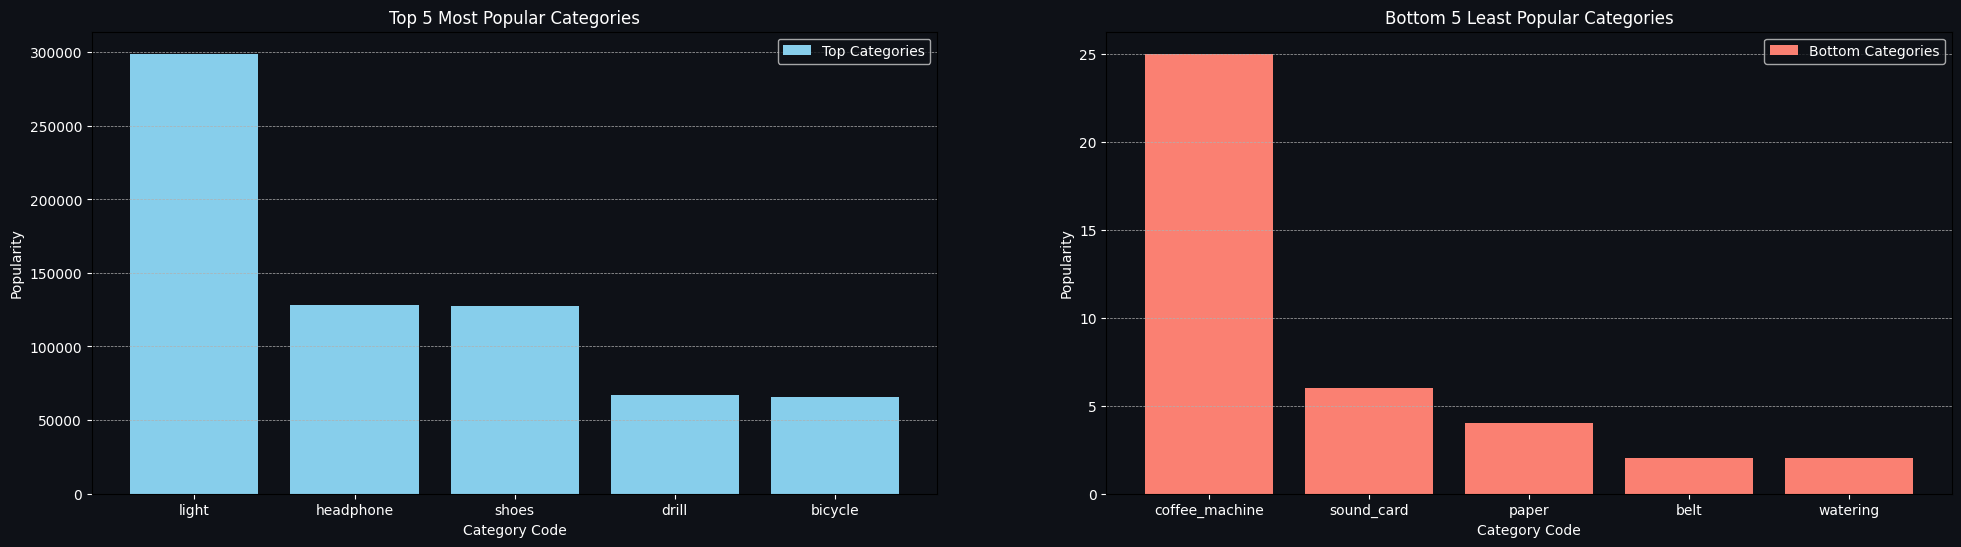

In [ ]:
df = pd.read_csv(file_path_prefix + filename7)

top_n = 5
bottom_n = 5

theme_black = '#0e1117'

category_popularity = df['category_code'].value_counts()

top_categories = category_popularity.head(top_n)
bottom_categories = category_popularity.tail(bottom_n)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6), facecolor=theme_black)

top_x_labels = [category.split('.')[-1] for category in top_categories.index]
top_bars = axes[0].bar(top_x_labels, top_categories.values, color='skyblue')
axes[0].set_title(f'Top {top_n} Most Popular Categories', color='white')
axes[0].set_xlabel('Category Code', color='white')
axes[0].set_ylabel('Popularity', color='white')
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].set_facecolor(theme_black)

bottom_x_labels = [category.split('.')[-1] for category in bottom_categories.index]
bottom_bars = axes[1].bar(bottom_x_labels, bottom_categories.values, color='salmon')
axes[1].set_title(f'Bottom {bottom_n} Least Popular Categories', color='white')
axes[1].set_xlabel('Category Code', color='white')
axes[1].set_ylabel('Popularity', color='white')
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].set_facecolor(theme_black)

axes[0].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
axes[1].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

legend_0 = axes[0].legend([top_bars[0]], ['Top Categories'], loc='upper right', facecolor=theme_black)
legend_1 = axes[1].legend([bottom_bars[0]], ['Bottom Categories'], loc='upper right', facecolor=theme_black)
legend_0.get_texts()[0].set_color('white')
legend_1.get_texts()[0].set_color('white')

plt.show()

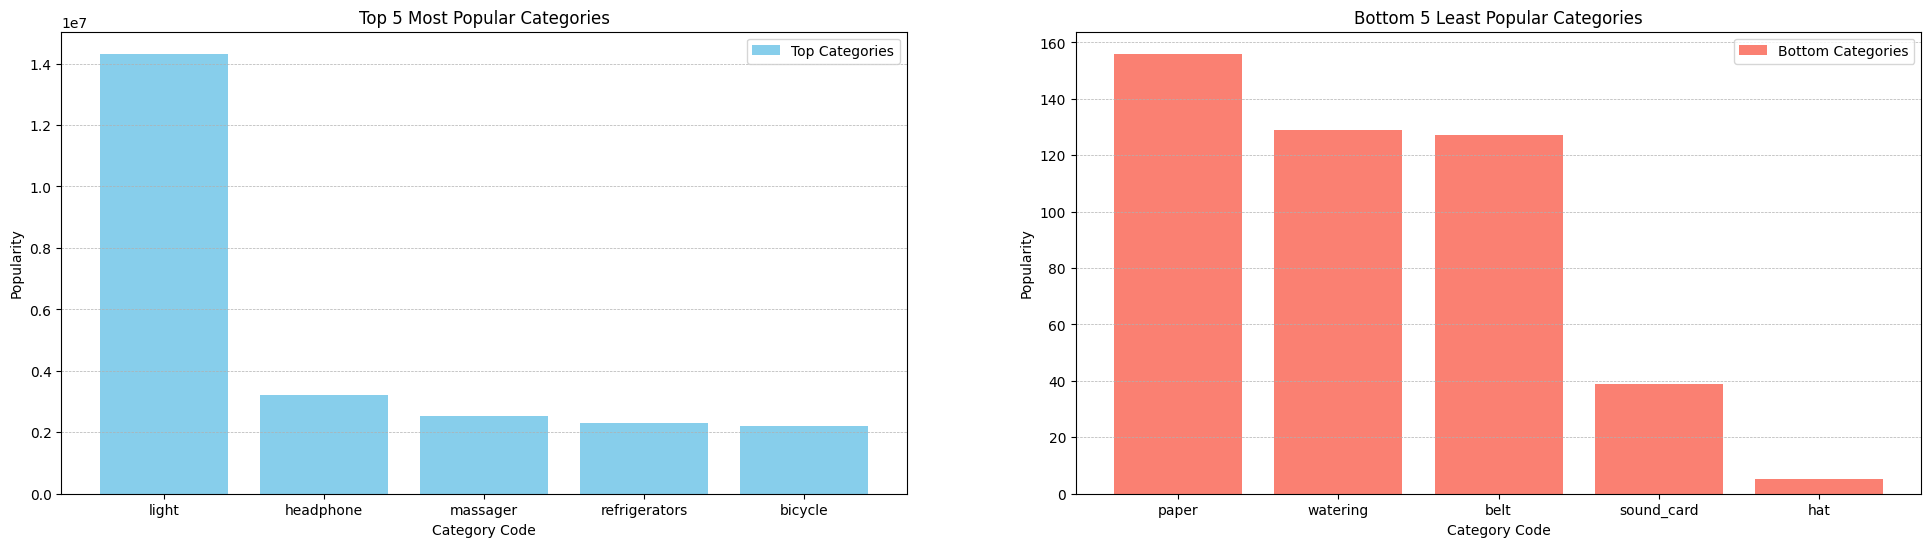

In [ ]:
# only need category_code and counut
raw_file_path_prefix = "/content/drive/MyDrive/raw_dataset/"
raw_filename1 = "2019-Oct.csv"
raw_filename2 = "2019-Nov.csv"
raw_filename3 = "2019-Dec.csv"
raw_filename4 = "2020-Jan.csv"
raw_filename5 = "2020-Feb.csv"
raw_filename6 = "2020-Mar.csv"
raw_filename7 = "2020-Apr.csv"

df = pd.read_csv(raw_file_path_prefix + raw_filename7, usecols=['event_type', 'category_code'])

top_n = 5
bottom_n = 5

category_popularity = df['category_code'].value_counts()

top_categories = category_popularity.head(top_n)
bottom_categories = category_popularity.tail(bottom_n)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

top_x_labels = [category.split('.')[-1] for category in top_categories.index]
top_bars = axes[0].bar(top_x_labels, top_categories.values, color='skyblue')
axes[0].set_title(f'Top {top_n} Most Popular Categories')
axes[0].set_xlabel('Category Code')
axes[0].set_ylabel('Popularity')
axes[0].tick_params(axis='x')
axes[0].tick_params(axis='y')

bottom_x_labels = [category.split('.')[-1] for category in bottom_categories.index]
bottom_bars = axes[1].bar(bottom_x_labels, bottom_categories.values, color='salmon')
axes[1].set_title(f'Bottom {bottom_n} Least Popular Categories')
axes[1].set_xlabel('Category Code')
axes[1].set_ylabel('Popularity')
axes[1].tick_params(axis='x')
axes[1].tick_params(axis='y')

axes[0].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
axes[1].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

legend_0 = axes[0].legend([top_bars[0]], ['Top Categories'], loc='upper right')
legend_1 = axes[1].legend([bottom_bars[0]], ['Bottom Categories'], loc='upper right')

plt.show()

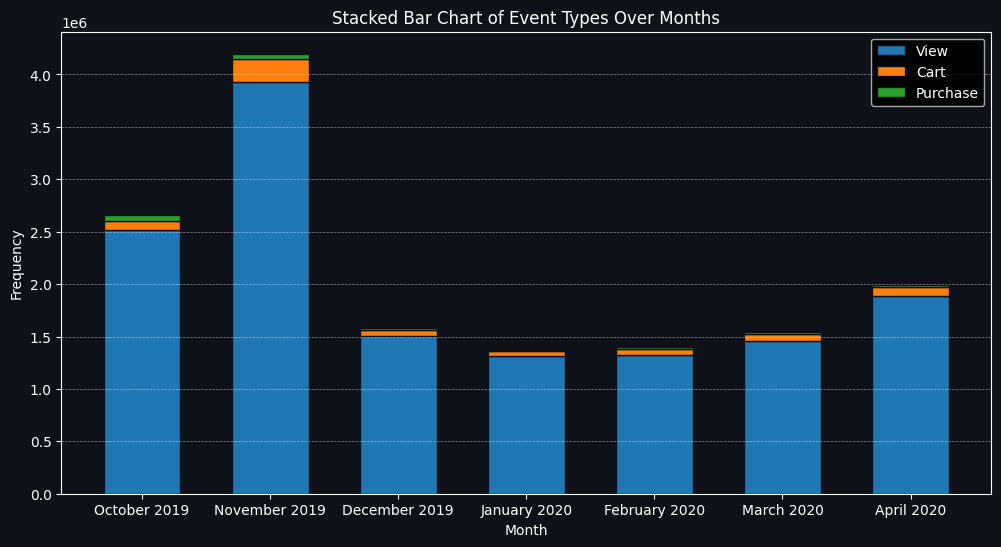

In [ ]:
df_stacked = pd.DataFrame({
    "Month": list(behavior_data.keys()),
    "View": [data['Frequency'][0] for data in behavior_data.values()],
    "Cart": [data['Frequency'][1] for data in behavior_data.values()],
    "Purchase": [data['Frequency'][2] for data in behavior_data.values()]
})
plt.figure(figsize=(12, 6))
df_stacked['Total'] = df_stacked['View'] + df_stacked['Cart'] + df_stacked['Purchase']

color_view = '#1f77b4'
color_cart = '#ff7f0e'
color_purchase = '#2ca02c'

bar_width = 0.6
bar_gap = 0.2

plt.bar(df_stacked['Month'], df_stacked['View'], width=bar_width, label='View', color=color_view, edgecolor=theme_black)
plt.bar(df_stacked['Month'], df_stacked['Cart'], width=bar_width, bottom=df_stacked['View'] + bar_gap, label='Cart', color=color_cart, edgecolor=theme_black)
plt.bar(df_stacked['Month'], df_stacked['Purchase'], width=bar_width, bottom=df_stacked['Cart'] + bar_gap + df_stacked['View'] + bar_gap, label='Purchase', color=color_purchase, edgecolor=theme_black)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Event Types Over Months')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.gcf().set_facecolor(theme_black)
plt.gca().set_facecolor(theme_black)

plt.show()

In [ ]:
df = pd.read_csv(file_path_prefix + filename7)
event_counts = df['event_type'].value_counts()

event_statistics = pd.DataFrame({
    'Event Type': event_counts.index,
    'Frequency': event_counts.values,
    'Percentage': event_counts / len(df) * 100
})

print(event_statistics)

         Event Type  Frequency  Percentage
view           view    1888532   94.690550
cart           cart      81669    4.094864
purchase   purchase      24224    1.214586


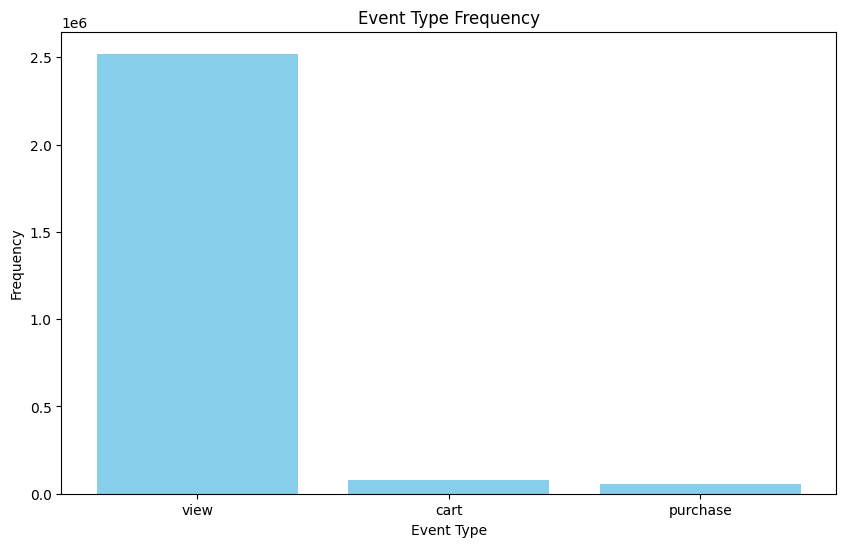

In [ ]:
event_counts = df['event_type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(event_counts.index, event_counts.values, color='skyblue')
plt.title('Event Type Frequency')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

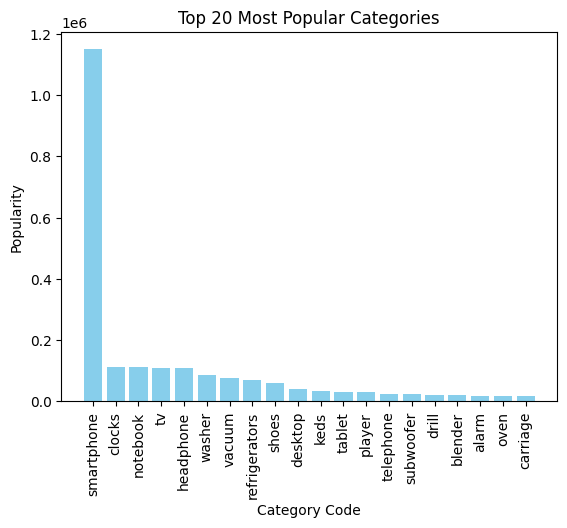

In [ ]:
top_n = 20

category_popularity = df['category_code'].value_counts()
top_categories = category_popularity.head(top_n)

x_labels = [category.split('.')[-1] for category in top_categories.index]
plt.bar(x_labels, top_categories.values, color='skyblue')
plt.title(f'Top {top_n} Most Popular Categories')
plt.xlabel('Category Code')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for filename in file_list:

  print(f"reading {filename} ...")
  df = pd.read_csv(file_path_prefix+filename)
  df['event_time'] = pd.to_datetime(df['event_time'], utc=True)
  df['event_date'] = df['event_time'].dt.date
  df.to_csv(f"{file_path_prefix}dated-{filename}", index=False, header=True)

  print(f"dated-{filename} exported successfully")

reading filtered-sampled-cleaned-2019-Nov.csv ...
dated-filtered-sampled-cleaned-2019-Nov.csv exported successfully
reading filtered-sampled-cleaned-2019-Dec.csv ...
dated-filtered-sampled-cleaned-2019-Dec.csv exported successfully
reading filtered-sampled-cleaned-2020-Jan.csv ...
dated-filtered-sampled-cleaned-2020-Jan.csv exported successfully
reading filtered-sampled-cleaned-2020-Feb.csv ...
dated-filtered-sampled-cleaned-2020-Feb.csv exported successfully
reading filtered-sampled-cleaned-2020-Mar.csv ...
dated-filtered-sampled-cleaned-2020-Mar.csv exported successfully
reading filtered-sampled-cleaned-2020-Apr.csv ...
dated-filtered-sampled-cleaned-2020-Apr.csv exported successfully


In [ ]:
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,rating,event_date
0,2019-10-01 06:52:23+00:00,view,1004858,2053013555631882655,electronics.smartphone,samsung,134.41,541078402,1550a742-6826-4158-80b4-f1cd21e52580,1,2019-10-01
1,2019-10-01 11:49:20+00:00,view,5100719,2053013553341792533,electronics.clocks,samsung,151.61,541677055,158d7717-f9b6-441d-8646-1f79a0e4b348,1,2019-10-01
2,2019-10-01 18:07:39+00:00,view,46800027,2110187395394568257,appliances.kitchen.refrigerators,alpicool,668.93,515721215,485b21c2-c789-48be-ac1d-743716c8508d,1,2019-10-01
3,2019-10-01 09:13:57+00:00,view,28719200,2053013565639492569,apparel.shoes,salamander,146.46,539251936,fdc0799a-e753-484d-a89a-fab103b6b3a5,1,2019-10-01
4,2019-10-02 06:59:39+00:00,view,1004992,2053013555631882655,electronics.smartphone,oppo,257.38,512748185,4ec206ac-0cae-48af-b35f-bf947a2eb5a3,1,2019-10-02


In [ ]:
plt.figure(figsize=(12, 6))
df_stacked['Total'] = df_stacked['View'] + df_stacked['Cart'] + df_stacked['Purchase']

color_view = '#1f77b4'
color_cart = '#ff7f0e'
color_purchase = '#2ca02c'

bar_width = 0.6
bar_gap = 0.2
plt.bar(df_stacked['Month'], df_stacked['View'], width=bar_width, label='View', color=color_view, edgecolor=theme_black)
plt.bar(df_stacked['Month'], df_stacked['Cart'], width=bar_width, bottom=df_stacked['View'] + bar_gap, label='Cart', color=color_cart, edgecolor=theme_black)
plt.bar(df_stacked['Month'], df_stacked['Purchase'], width=bar_width, bottom=df_stacked['Cart'] + bar_gap + df_stacked['View'] + bar_gap, label='Purchase', color=color_purchase, edgecolor=theme_black)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Event Types Over Months')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.gcf().set_facecolor(theme_black)
plt.gca().set_facecolor(theme_black)

# Show the plot
plt.show()

In [ ]:
dated_file_name_list = [
  "dated-filtered-sampled-cleaned-2019-Oct.csv",
  "dated-filtered-sampled-cleaned-2019-Nov.csv",
  "dated-filtered-sampled-cleaned-2019-Dec.csv",
  "dated-filtered-sampled-cleaned-2020-Jan.csv",
  "dated-filtered-sampled-cleaned-2020-Feb.csv",
  "dated-filtered-sampled-cleaned-2020-Mar.csv",
  "dated-filtered-sampled-cleaned-2020-Apr.csv",
]

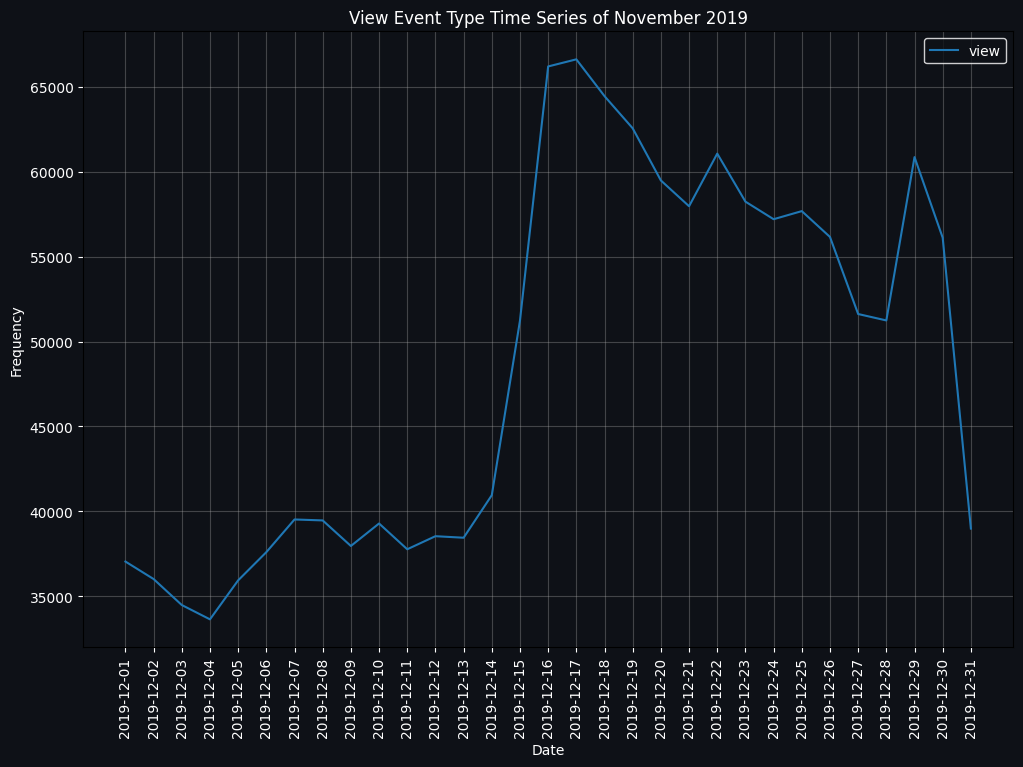

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

df = pd.read_csv(file_path_prefix + dated_file_name_list[2])

theme_black = '#0e1117'
view_events = df[df['event_type'] == 'view']
view_counts = view_events.groupby('event_date').size()

plt.figure(figsize=(12, 8))
plt.plot(view_counts.index, view_counts.values, label='view')
plt.title('View Event Type Time Series of November 2019', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Frequency', color='white')
plt.legend()
plt.grid(alpha=0.32)
plt.gcf().set_facecolor(theme_black)
plt.gca().set_facecolor(theme_black)
plt.xticks(rotation=90)
plt.tick_params(axis='both', colors='white')

legend = plt.legend(frameon=True, facecolor=theme_black, edgecolor='white')
legend.get_texts()[0].set_color("white")

plt.show()

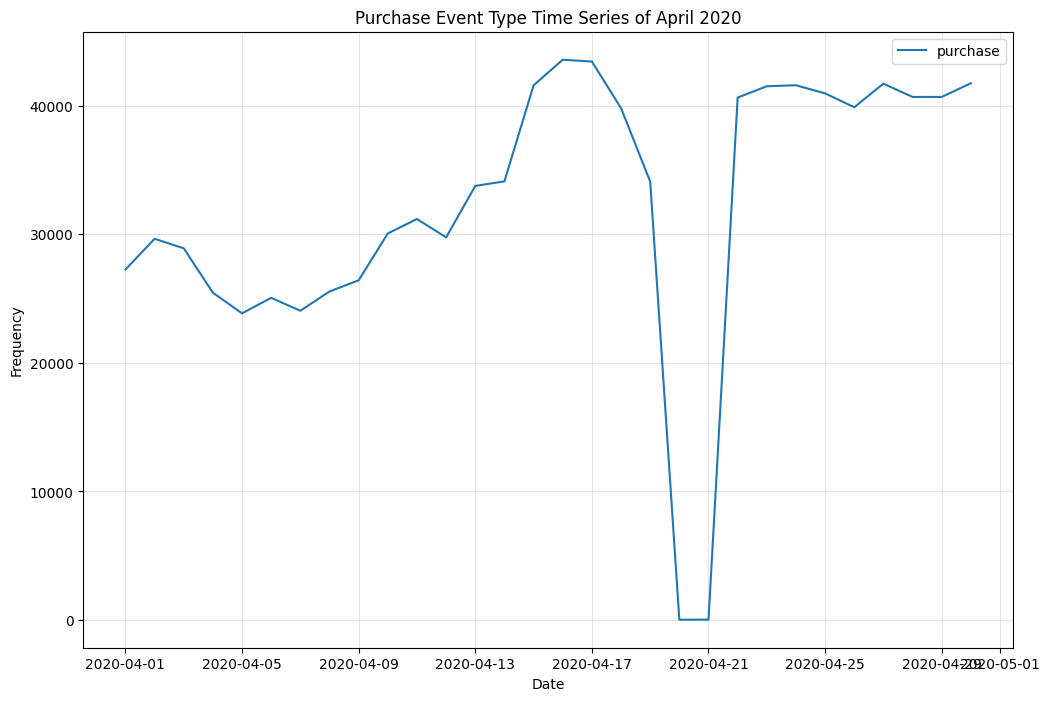

In [ ]:
raw_file_path_prefix = "/content/drive/MyDrive/raw_dataset/"
raw_filename1 = "2019-Oct.csv"
raw_filename2 = "2019-Nov.csv"
raw_filename3 = "2019-Dec.csv"
raw_filename4 = "2020-Jan.csv"
raw_filename5 = "2020-Feb.csv"
raw_filename6 = "2020-Mar.csv"
raw_filename7 = "2020-Apr.csv"

df = pd.read_csv(raw_file_path_prefix + raw_filename7, usecols=['event_type', 'event_time'])
df['event_time'] = pd.to_datetime(df['event_time'])
df['event_date'] = df['event_time'].dt.date
purchase_events = df[df['event_type'] == 'purchase']
purchase_counts = purchase_events.groupby('event_date').size()

plt.figure(figsize=(12, 8))
plt.plot(purchase_counts.index, purchase_counts.values, label='purchase')
plt.title('Purchase Event Type Time Series of April 2020')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.32)
plt.show()